- Se simplifican concentraciones de iones y la presencia de las vainas

1. Alfa
2. m, n y h
3. Valores

No hay valores iniciales de m, n y h hay que encontrarlos a partir del potencial de reposo calcular alphas y betas e igualar las derivaadas a cero para encontrar m, n y h.

Teniendo el modelo corriendo hay que estimular con un impulso de corriente de 15 y que dure 1ms

## 1.
Implemente el modelo de Huxley-Hodking con las ecuaciones y los parámetros dados.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

gNa_cte = 120 #ms/cm²
gK_cte = 36
gL_cte = 0.3

ENa = 45.0 #mV
EK = -82.0
EL = -59.0

C_m = 1.0 #\muAms/cm²


def alpha_m(V):
	return ((V+45)*0.1)/(1-pow(np.e, ((-1*(V+45))/10)))

def alpha_h(V):
	return 0.07 * pow(np.e, (-1*(V+70)/20))

def alpha_n(V):
	return ((V+60)*0.01)/(1-pow(np.e, ((-1*(V+60))/10)))

def beta_m(V):
	return 4*pow(np.e, ((-1*(V+70))/18))

def beta_h(V):
	return 1/(1+pow(np.e, ((-1*(V+40))/10)))

def beta_n(V):
	return 0.125*pow(np.e, ((-1*(V+70))/80))


def dm_dt(V, m):
	return alpha_m(V)*(1-m)-beta_m(V)*m

def dh_dt(V, h):
	return alpha_h(V)*(1-h)-beta_h(V)*h

def dn_dt(V, n):
	return alpha_n(V)*(1-n)-beta_n(V)*n

def gNa(m, h):
	return gNa_cte*(pow(m, 3))*h

def gK(n):
	return gK_cte*(pow(n, 4))

def g(gNa, gK, gL):
	return gNa + gK + gL

def Em(gNa, gK, gL):
	return (gNa*ENa + gK * EK + gL * EL) / (gNa + gK + gL)

# def dv_dt(I, v, gK, gNa, gL):
# 	return (I - gK * (v + EK) - gNa * (v - ENa) - gL * (v + EL)) / C_m


def dv_dt(I, v, gK, gNa, gL):
	return I - g(gNa, gK, gL) * (v - Em(gNa, gK, gL)) / C_m

def euler(ts, m_0, h_0, n_0, v_0, I_s):
	dt = ts[1] - ts[0]
	# print(dt)
	v_s = np.zeros(len(ts))
	m_s = np.zeros(len(ts))
	n_s = np.zeros(len(ts))
	h_s = np.zeros(len(ts))
	gNa_s = np.zeros(len(ts))
	gK_s = np.zeros(len(ts))
	v_s[0] = v_0
	m_s[0] = m_0
	h_s[0] = h_0
	n_s[0] = n_0 
	gNa_s[0] = gNa(m_s[0], h_s[0])
	gK_s[0] = gK(n_s[0])
	gL = gL_cte
	
	# print(f"gNa(0)={gNa_s[0]}\ngK(0)={gK_s[0]}\ngL={gL_cte}")
	for i in range(1, len(ts)):
		m_s[i] = m_s[i-1] + dt * dm_dt(v_s[i-1], m_s[i-1])
		n_s[i] = n_s[i-1] + dt * dn_dt(v_s[i-1], n_s[i-1])
		h_s[i] = h_s[i-1] + dt * dh_dt(v_s[i-1], h_s[i-1])

		gNa_s[i] = gNa(m_s[i], h_s[i])
		gK_s[i] = gK(n_s[i])

		v_s[i] = v_s[i-1] + dt * dv_dt(I_s[i], v_s[i-1], gK_s[i], gNa_s[i], gL)

	return v_s, gNa_s, gK_s, m_s, n_s, h_s

m(0)=0.0529324852572496
n(0)=0.317676914060697
h(0)=0.596120753508459


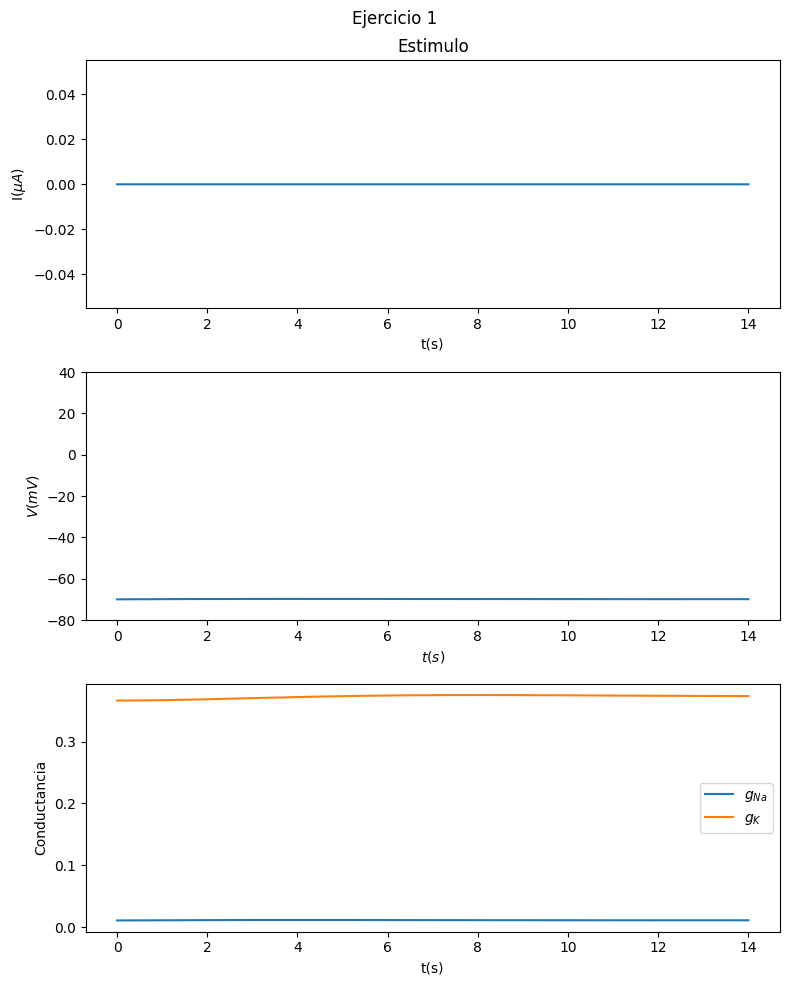

In [8]:
pot_reposo = -70.0

alpha_m_0 = alpha_m(pot_reposo)
alpha_h_0 = alpha_h(pot_reposo)
alpha_n_0 = alpha_n(pot_reposo)

beta_m_0 = beta_m(pot_reposo)
beta_h_0 = beta_h(pot_reposo)
beta_n_0 = beta_n(pot_reposo)

m_sp = sp.Symbol('m')
m_0 = sp.solve(sp.Eq(alpha_m_0*(1-m_sp)-beta_m_0*m_sp, 0))[0]
h_sp = sp.Symbol('h')
h_0 = sp.solve(sp.Eq(alpha_h_0*(1-h_sp)-beta_h_0*h_sp, 0))[0]
n_sp = sp.Symbol('n')
n_0 = sp.solve(sp.Eq(alpha_n_0*(1-n_sp)-beta_n_0*n_sp, 0))[0]

print(f"m(0)={m_0}\nn(0)={n_0}\nh(0)={h_0}")

paso = 0.001
ts = np.arange(0, 14, paso)


Is1 = np.zeros(len(ts))
vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is1)

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Título de la figura
fig.suptitle("Ejercicio 1")

# Primer subplot
axs[0].set_title("Estimulo")
axs[0].plot(ts, Is1)
axs[0].set_ylabel(r"I($\mu A$)")
axs[0].set_xlabel("t(s)")

# Segundo subplot
axs[1].plot(ts, vs)
axs[1].set_ylabel(r"$V(mV)$")
axs[1].set_xlabel(r"$t(s)$")
axs[1].set_ylim(-80, 40)

# Tercer subplot
axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
axs[2].plot(ts, gK_s, label=r"$g_{K}$")
axs[2].legend()
axs[2].set_ylabel("Conductancia")
axs[2].set_xlabel("t(s)")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 2.
Pruebe el modelo mediante la aplicación de un pulso de corriente $I$ de $15 \mu A$ durante $1 ms$ a una neurona que se encuentra estable antes del pulso ($V=-70mV$ para neurona estable). Grafique $V,~g_{Na}~ \text{y}~ g_K$ con respecto al tiempo.

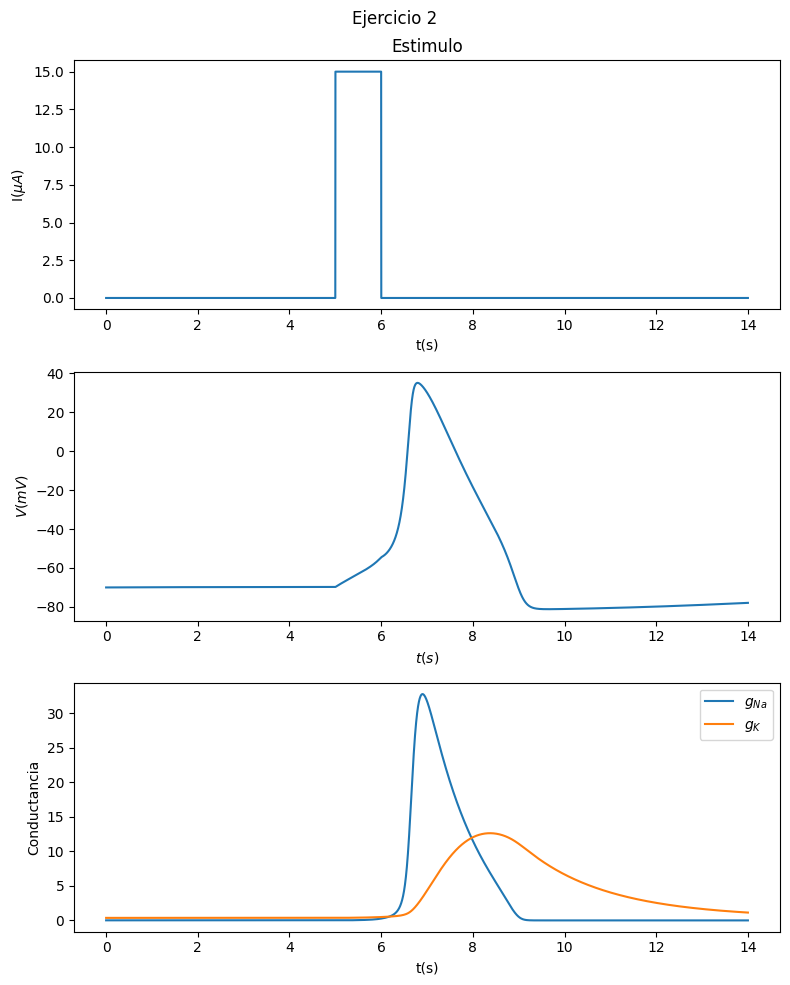

In [9]:
paso = 0.001
ts = np.arange(0, 14, paso)


Is1 = np.zeros(len(ts))
Is1[int(5/paso):int(6/paso)] = [15] * len(Is1[int(5/paso):int(6/paso)])
vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is1)

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Título de la figura
fig.suptitle("Ejercicio 2")

# Primer subplot
axs[0].set_title("Estimulo")
axs[0].plot(ts, Is1)
axs[0].set_ylabel(r"I($\mu A$)")
axs[0].set_xlabel("t(s)")

# Segundo subplot
axs[1].plot(ts, vs)
axs[1].set_ylabel(r"$V(mV)$")
axs[1].set_xlabel(r"$t(s)$")

# Tercer subplot
axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
axs[2].plot(ts, gK_s, label=r"$g_{K}$")
axs[2].legend()
axs[2].set_ylabel("Conductancia")
axs[2].set_xlabel("t(s)")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 3. 
Pruebe el modelo mediante la aplicación de varios pulsos de corriente de diferentes amplitudes y duración, espaciados por intervalos de distinta duración.

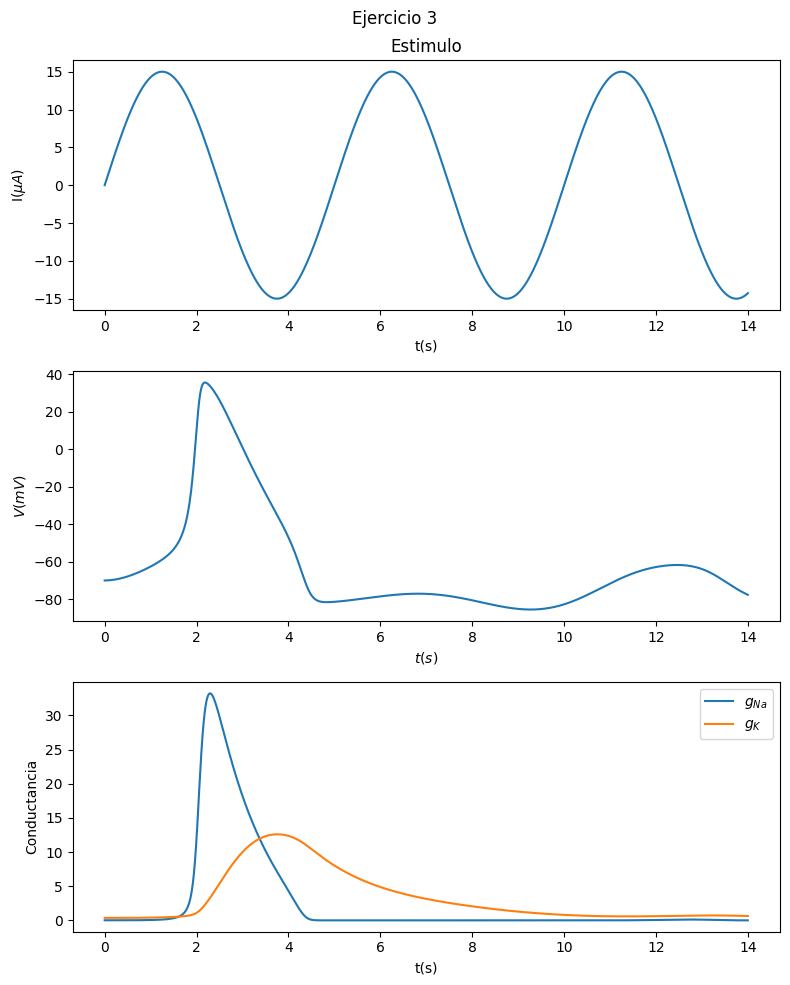

In [10]:
amplitud = 15
periodo = 5
f = 1 / periodo
Is2 = amplitud*np.sin(2*np.pi*f*ts)

vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is2)

# Crear la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Título de la figura
fig.suptitle("Ejercicio 3")

# Primer subplot
axs[0].set_title("Estimulo")
axs[0].plot(ts, Is2)
axs[0].set_ylabel(r"I($\mu A$)")
axs[0].set_xlabel("t(s)")

# Segundo subplot
axs[1].plot(ts, vs)
axs[1].set_ylabel(r"$V(mV)$")
axs[1].set_xlabel(r"$t(s)$")

# Tercer subplot
axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
axs[2].plot(ts, gK_s, label=r"$g_{K}$")
axs[2].legend()
axs[2].set_ylabel("Conductancia")
axs[2].set_xlabel("t(s)")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 4.
Experimente con distintos valores de inicialización de $V$ manteniendo $I$ en cero para determinar el umbral de disparo del potencial de acción.

Probando V(0) = -70.0000000000017 como umbral
Probando V(0) = -70.1000000000017 como umbral
Probando V(0) = -70.2000000000017 como umbral
Probando V(0) = -70.30000000000169 como umbral
Probando V(0) = -70.40000000000168 como umbral
Probando V(0) = -70.50000000000168 como umbral
Probando V(0) = -70.60000000000167 como umbral
Probando V(0) = -70.70000000000167 como umbral
Probando V(0) = -70.80000000000166 como umbral
Probando V(0) = -70.90000000000165 como umbral
Probando V(0) = -71.00000000000165 como umbral
Probando V(0) = -71.10000000000164 como umbral
Probando V(0) = -71.20000000000164 como umbral
Probando V(0) = -71.30000000000163 como umbral
Probando V(0) = -71.40000000000163 como umbral
Probando V(0) = -71.50000000000162 como umbral
Probando V(0) = -71.60000000000161 como umbral
Probando V(0) = -71.70000000000161 como umbral
Probando V(0) = -71.8000000000016 como umbral
Probando V(0) = -71.9000000000016 como umbral
Probando V(0) = -72.00000000000159 como umbral
Probando V(0) = -7

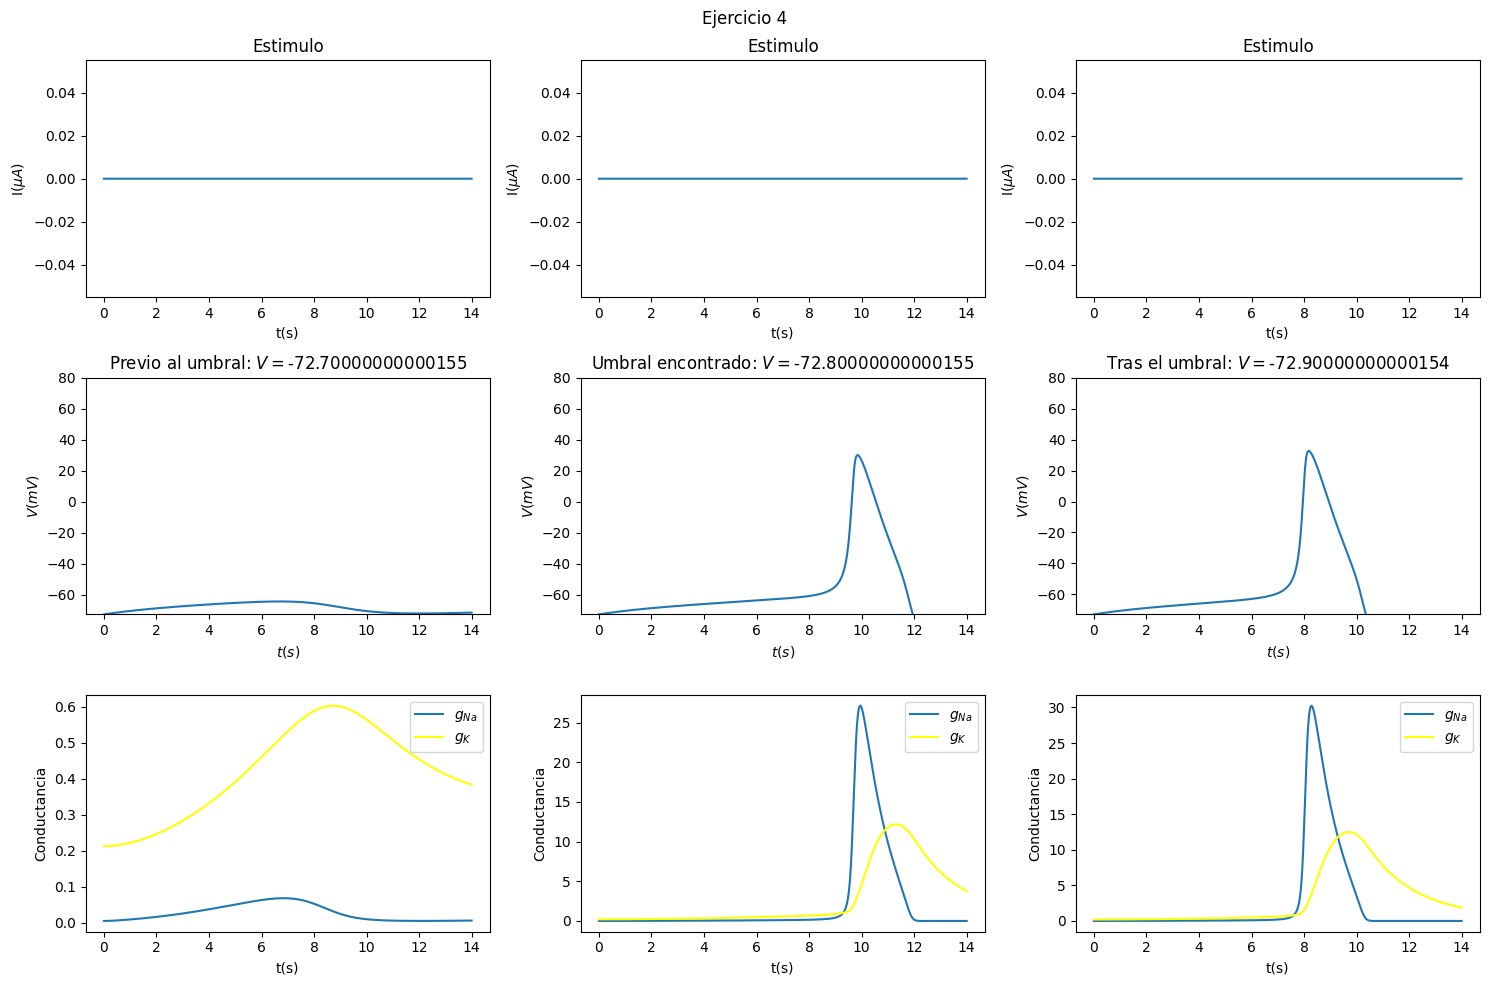

In [11]:
Is3 = np.zeros(len(ts))
paso_pot = 0.1
potenciales = np.arange(-100, -70+paso_pot, paso_pot)
potenciales = potenciales[::-1]

umbral_encontrado = False
for i in potenciales:
	if umbral_encontrado:
		break
	else:
		print(f"Probando V(0) = {i} como umbral")
		alpha_m_0 = alpha_m(i)
		alpha_h_0 = alpha_h(i)
		alpha_n_0 = alpha_n(i)

		beta_m_0 = beta_m(i)
		beta_h_0 = beta_h(i)
		beta_n_0 = beta_n(i)

		m_sp = sp.Symbol('m')
		m_0 = sp.solve(sp.Eq(alpha_m_0*(1-m_sp)-beta_m_0*m_sp, 0))[0]
		h_sp = sp.Symbol('h')
		h_0 = sp.solve(sp.Eq(alpha_h_0*(1-h_sp)-beta_h_0*h_sp, 0))[0]
		n_sp = sp.Symbol('n')
		n_0 = sp.solve(sp.Eq(alpha_n_0*(1-n_sp)-beta_n_0*n_sp, 0))[0]

		vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, i, Is3)

		for j in vs:
			if j > 0:
				umbral_encontrado = True

				# Crear la figura y los ejes
				fig, axs = plt.subplots(3, 3, figsize=(15, 10))

				# Título de la figura
				fig.suptitle("Ejercicio 4")

				# Primer subplot
				alpha_m_0 = alpha_m(i+paso_pot)
				alpha_h_0 = alpha_h(i+paso_pot)
				alpha_n_0 = alpha_n(i+paso_pot)

				beta_m_0 = beta_m(i+paso_pot)
				beta_h_0 = beta_h(i+paso_pot)
				beta_n_0 = beta_n(i+paso_pot)

				m_sp = sp.Symbol('m')
				m_01 = sp.solve(sp.Eq(alpha_m_0*(1-m_sp)-beta_m_0*m_sp, 0))[0]
				h_sp = sp.Symbol('h')
				h_01 = sp.solve(sp.Eq(alpha_h_0*(1-h_sp)-beta_h_0*h_sp, 0))[0]
				n_sp = sp.Symbol('n')
				n_01 = sp.solve(sp.Eq(alpha_n_0*(1-n_sp)-beta_n_0*n_sp, 0))[0]
				vs1, gNa_s1, gK_s1, m_s, n_s, h_s = euler(ts, m_01, h_01, n_01, i+paso_pot, Is3)
				axs[0, 0].set_title("Estimulo")
				axs[0, 0].plot(ts, Is3)
				axs[0, 0].set_ylabel(r"I($\mu A$)")
				axs[0, 0].set_xlabel("t(s)")

				# Segundo subplot
				axs[1, 0].set_title(f"Previo al umbral: $V = ${i+paso_pot}")
				axs[1, 0].plot(ts, vs1)
				axs[1, 0].set_ylim(i+paso_pot, 80)
				axs[1, 0].set_ylabel(r"$V(mV)$")
				axs[1, 0].set_xlabel(r"$t(s)$")

				# Tercer subplot
				axs[2, 0].plot(ts, gNa_s1, label=r"$g_{Na}$")
				axs[2, 0].plot(ts, gK_s1, label=r"$g_{K}$", color='yellow')
				axs[2, 0].legend()
				axs[2, 0].set_ylabel("Conductancia")
				axs[2, 0].set_xlabel("t(s)")

				# Segunda columna
				alpha_m_0 = alpha_m(i)
				alpha_h_0 = alpha_h(i)
				alpha_n_0 = alpha_n(i)

				beta_m_0 = beta_m(i)
				beta_h_0 = beta_h(i)
				beta_n_0 = beta_n(i)

				m_sp = sp.Symbol('m')
				m_02 = sp.solve(sp.Eq(alpha_m_0*(1-m_sp)-beta_m_0*m_sp, 0))[0]
				h_sp = sp.Symbol('h')
				h_02 = sp.solve(sp.Eq(alpha_h_0*(1-h_sp)-beta_h_0*h_sp, 0))[0]
				n_sp = sp.Symbol('n')
				n_02 = sp.solve(sp.Eq(alpha_n_0*(1-n_sp)-beta_n_0*n_sp, 0))[0]
				vs2, gNa_s2, gK_s2, m_s, n_s, h_s = euler(ts, m_02, h_02, n_02, i, Is3)
				# Primer subplot
				axs[0, 1].set_title("Estimulo")
				axs[0, 1].plot(ts, Is3)
				axs[0, 1].set_ylabel(r"I($\mu A$)")
				axs[0, 1].set_xlabel("t(s)")

				# Segundo subplot
				axs[1, 1].set_title(f"Umbral encontrado: $V = ${i}")
				axs[1, 1].plot(ts, vs2)
				axs[1, 1].set_ylim(i, 80)
				axs[1, 1].set_ylabel(r"$V(mV)$")
				axs[1, 1].set_xlabel(r"$t(s)$")

				# Tercer subplot
				axs[2, 1].plot(ts, gNa_s2, label=r"$g_{Na}$")
				axs[2, 1].plot(ts, gK_s2, label=r"$g_{K}$", color='yellow')
				axs[2, 1].legend()
				axs[2, 1].set_ylabel("Conductancia")
				axs[2, 1].set_xlabel("t(s)")

				# Tercer columna
				alpha_m_0 = alpha_m(i-paso_pot)
				alpha_h_0 = alpha_h(i-paso_pot)
				alpha_n_0 = alpha_n(i-paso_pot)

				beta_m_0 = beta_m(i-paso_pot)
				beta_h_0 = beta_h(i-paso_pot)
				beta_n_0 = beta_n(i-paso_pot)

				m_sp = sp.Symbol('m')
				m_02 = sp.solve(sp.Eq(alpha_m_0*(1-m_sp)-beta_m_0*m_sp, 0))[0]
				h_sp = sp.Symbol('h')
				h_02 = sp.solve(sp.Eq(alpha_h_0*(1-h_sp)-beta_h_0*h_sp, 0))[0]
				n_sp = sp.Symbol('n')
				n_02 = sp.solve(sp.Eq(alpha_n_0*(1-n_sp)-beta_n_0*n_sp, 0))[0]
				vs3, gNa_s3, gK_s3, m_s, n_s, h_s = euler(ts, m_02, h_02, n_02, i-paso_pot, Is3)
				# Primer subplot
				axs[0, 2].set_title("Estimulo")
				axs[0, 2].plot(ts, Is3)
				axs[0, 2].set_ylabel(r"I($\mu A$)")
				axs[0, 2].set_xlabel("t(s)")

				# Segundo subplot
				axs[1, 2].set_title(f"Tras el umbral: $V = ${i-paso_pot}")
				axs[1, 2].plot(ts, vs3)
				axs[1, 2].set_ylim(i-paso_pot, 80)
				axs[1, 2].set_ylabel(r"$V(mV)$")
				axs[1, 2].set_xlabel(r"$t(s)$")

				# Tercer subplot
				axs[2, 2].plot(ts, gNa_s3, label=r"$g_{Na}$")
				axs[2, 2].plot(ts, gK_s3, label=r"$g_{K}$", color='yellow')
				axs[2, 2].legend()
				axs[2, 2].set_ylabel("Conductancia")
				axs[2, 2].set_xlabel("t(s)")
				# Ajustar el espacio entre subplots
				plt.tight_layout()

				# Mostrar el gráfico
				plt.show()

				break

## 5.
Las neuronas sensoriales típicamente trabajan generando un tren de estímulos como respuesta a un estímulo estable y de larga duración. Evalúe el comportamiento del modelo implementado para simular esta situación mediante la aplicación de un valor de corriente estable durante un período de tiempo prolongado.

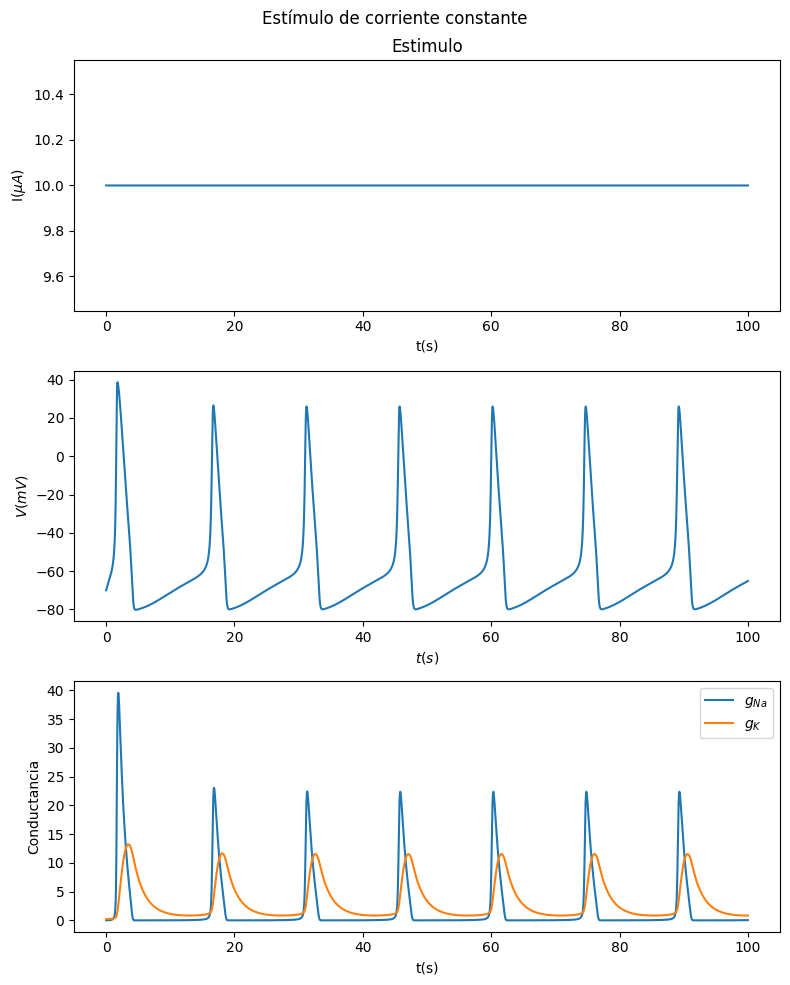

In [12]:
# Valor de corriente constante (en microamperios)
I_constante = 10
paso = 0.01
ts = np.arange(0, 100, paso)

# Crea un array para almacenar la corriente constante aplicada durante todo el período
Is_constante = [I_constante] * len(ts)

# Simula el comportamiento del modelo con el estímulo constante
vs, gNa_s, gK_s, m_s, n_s, h_s = euler(ts, m_0, h_0, n_0, pot_reposo, Is_constante)

# Grafica la corriente de entrada, el potencial de membrana y las conductancias de sodio y potasio a lo largo del tiempo
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle("Estímulo de corriente constante")

axs[0].set_title("Estimulo")
axs[0].plot(ts, Is_constante)
axs[0].set_ylabel(r"I($\mu A$)")
axs[0].set_xlabel("t(s)")

axs[1].plot(ts, vs)
axs[1].set_ylabel(r"$V(mV)$")
axs[1].set_xlabel(r"$t(s)$")

axs[2].plot(ts, gNa_s, label=r"$g_{Na}$")
axs[2].plot(ts, gK_s, label=r"$g_{K}$")
axs[2].legend()
axs[2].set_ylabel("Conductancia")
axs[2].set_xlabel("t(s)")

plt.tight_layout()
plt.show()